In [2]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
img_array = cv2.imread("Test_Dataset/CLosed_Eyes/s0016_00001_1_0_0_0_1_01.png", cv2.IMREAD_GRAYSCALE)

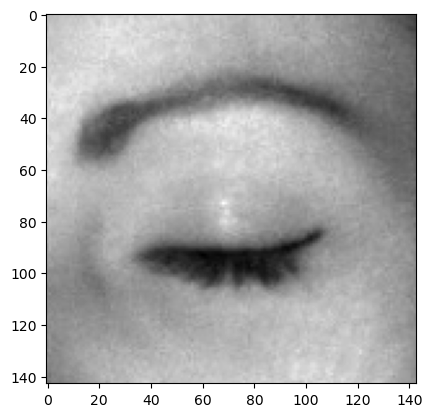

In [4]:
plt.imshow(img_array,cmap="gray")

In [5]:
img_array.shape

(143, 143)

In [6]:
Datadirectory = "Test_Dataset/" ## dataset of Testing

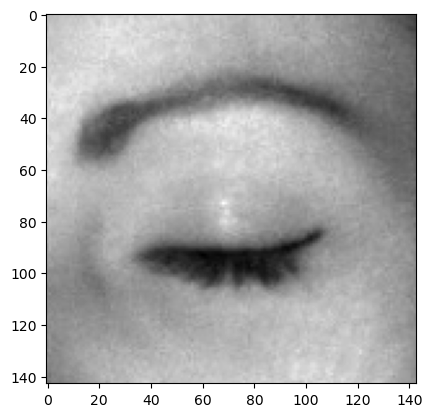

In [7]:
Classes = ["Closed_Eyes","Open_Eyes"]
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break
        

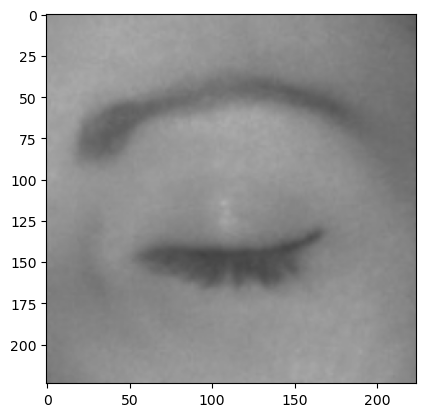

In [8]:
img_size = 224 ## image size=224*224
new_array = cv2.resize(backtorgb, (img_size , img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

## Reading all images data and convert them to array

In [ ]:
training_Data=[]

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)  ## 0,1
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

In [ ]:
create_training_Data()

In [ ]:
print(len(training_Data))

In [ ]:
import random

random.shuffle(training_Data)

In [ ]:
X = [] ## feature/data
y = [] ## label

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3)

In [ ]:
X.shape

In [ ]:
# normalizing data
X = X/225.0;

In [ ]:
Y = np.array (y)

In [ ]:
import pickle

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()


## Deep learning model

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = tf.keras.applications.MobileNetV2()

In [ ]:
model.summary()

## Transfer Learning

In [ ]:
base_input = model.layers[0].input

In [ ]:
base_output = model.layers[-4].output

In [ ]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation ('sigmoid')(final_output)

In [ ]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [ ]:
new_model.summary()

## Setting for binary classification

In [ ]:
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
new_model.fit(X,Y, epochs=2, validation_split = 0.1) 

In [ ]:
new_model.save(my_model.h5)

In [9]:
new_model = tf.keras.models.load_model('my_model.h5')

## Predictions

In [10]:
img_array = cv2.imread('s0001_00155_0_0_0_0_0_01.png', cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(backtorgb, (img_size, img_size))

In [11]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [12]:
X_input.shape

(1, 224, 224, 3)

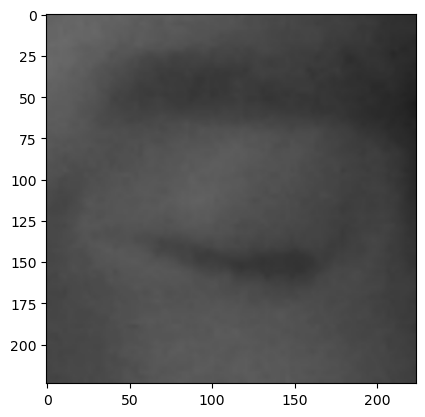

In [13]:
plt.imshow(new_array)

In [14]:
X_input = X_input/225.0

In [15]:
prediction = new_model.predict(X_input)

1/1 [==============================] - 3s 3s/step


In [16]:
prediction

array([[21.404629]], dtype=float32)

## Checking Unkown Images

In [17]:
img = cv2.imread('Sad_Man.jpg')

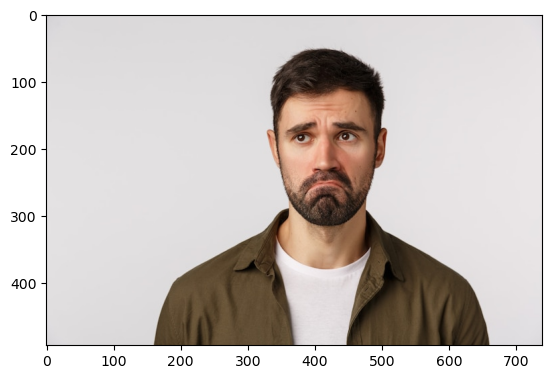

In [18]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [19]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [20]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml')

In [21]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [22]:
eyes = eye_cascade.detectMultiScale(gray, 1.1,4)

In [23]:
for(x, y, w, h) in eyes:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

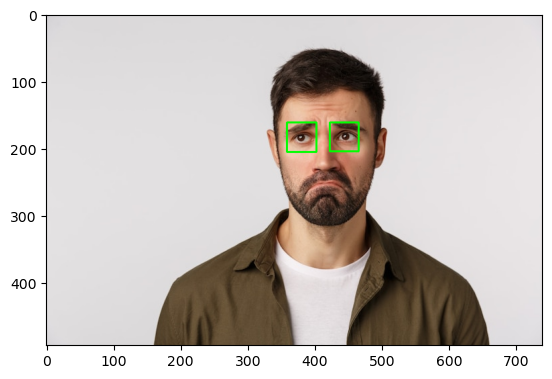

In [24]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

## Croping the Eye area

In [25]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades +'haarcascade_eye.xml') 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#print (faceCascade.empty())

eyes = eye_cascade.detectMultiScale(gray, 1.1,4)

for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color= img[y:y+h, x:x+w]
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
        print("eyes are not detected")
        
    else:
        for (ex, ey, ew, eh) in eyess:
            eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]

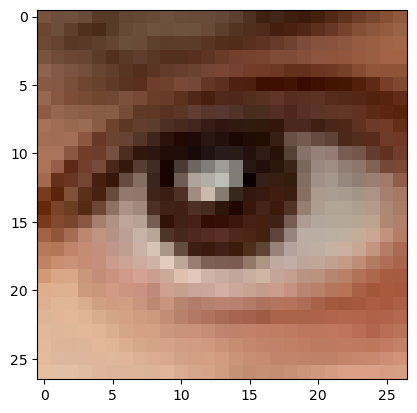

In [26]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [27]:
eyes_roi.shape

(27, 27, 3)

In [28]:
final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image, axis =0) 
final_image=final_image/255.0

In [29]:
final_image=final_image/255.0

In [30]:
new_model.predict(final_image)

1/1 [==============================] - 0s 109ms/step


array([[21.487661]], dtype=float32)

## Realtime Video Demo

In [ ]:
import cv2 
##pip install opencv-contrib-python fullpackage 
#from deepface import Deepface ##pip install deepface

path = "haarcascade frontalface default.xml"
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(1)
##Check if the webcam is opened correctly
if not cap.isOpened():
        cap = cv2.VideoCapture(0) 
if not cap.isOpened():
        raise IOError("Cannot open webcam")

while True:
        ret, frame = cap.read()
        eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        #print (faceCascade.empty())
        eyes = eye_cascade.detectMultiScale(gray, 1.1,4)

        for x,y,w,h in eyes:
            roi_gray =  gray[y:y+h, x:x+w]
            roi_color = frame[y:y+h, x:x+w]
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
            eyess = eye_cascade.detectMultiScale(roi_gray)

            if len(eyess) == 0:
                print("eyes are not detected")

            else:
                for (ex,ey,ew,eh) in eyess: 
                    eyes_roi = roi_color[ey:ey+eh, ex:ex + ew]

        final_image = cv2.resize(eyes_roi, (224,224))
        final_image = np.expand_dims(final_image, axis =0)  
        final_image = final_image/255.0

        Predictions = new_model.predict(final_image) 
        if (Predictions>0):
            status = "Open Eyes"
        else: 
            status = "Closed Eyes"

        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        print(faceCascade.empty())
        faces = faceCascade.detectMultiScale(gray,1.1,4)

         # Draw a rectangle around the faces
        for(x, y, w, h) in faces: 
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        font = cv2.FONT_HERSHEY_SIMPLEX

        #inserting text on video

        cv2.putText(frame,
                    status, 
                    (50, 50), 
                    font, 3, 
                    (0, 0, 255), 
                    2, 
                    cv2.LINE_4)
        cv2.imshow('Drowsiness Detection', frame)

        if cv2.waitKey(2) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllwindows()